In [1]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt
from scipy.misc import toimage
import numpy as np
import pandas as pd
%matplotlib inline

Using TensorFlow backend.


In [2]:
#IMG_CHANNELS = 3
#IMG_ROWS = 32
#IMG_COLS = 32
#NB_CLASSES = 10
#VERBOSE = 1
#VALIDATION_SPLIT = 0.2

In [3]:
## Loading data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
X = np.concatenate([X_train, X_test], axis=0)
y = np.concatenate([y_train, y_test], axis=0)

print(X.shape)

(60000, 32, 32, 3)


In [5]:
y = np_utils.to_categorical(y, 10)

In [6]:
# Normalization and conversion to float
X = X.astype('float32')
X /= 255

In [7]:
def get_class(y, class_num=False):
    classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    hot_list = [int(np.flatnonzero(y==1)) for y in y]
    if class_num:
        return([hot for hot in hot_list])
    else:
        return([classes[hot] for hot in hot_list])

y_class = get_class(y)
y_label = get_class(y = y, class_num=True)

automobile


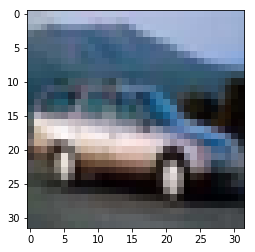

In [8]:
idx = 4
img = X[idx]
print(y_class[idx])
plt.imshow(toimage(img))

In [9]:
def get_images(class_label, X=X, y=y_class):
    idx = [i for i, x in enumerate(y_class) if x == class_label]
    return(X[idx])

airplane_imgs = get_images('airplane')
automobile_imgs = get_images('automobile')
bird_imgs = get_images('bird')
cat_imgs = get_images('cat')
dog_imgs = get_images('dog')
deer_imgs = get_images('deer')
frog_imgs = get_images('frog')
horse_imgs = get_images('horse')
ship_imgs = get_images('ship')
truck_imgs = get_images('truck')

In [10]:
dog_imgs.shape

(6000, 32, 32, 3)

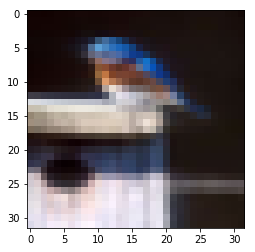

In [11]:
plt.imshow(toimage(bird_imgs[1]))

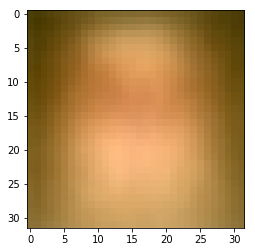

In [12]:
## Plot the mean image for each category
mean_airplane_img = np.mean(airplane_imgs, 0)
mean_automobile_img = np.mean(automobile_imgs, 0)
mean_bird_img = np.mean(bird_imgs, 0)
mean_cat_img = np.mean(cat_imgs, 0)
mean_dog_img = np.mean(dog_imgs, 0)
mean_deer_img = np.mean(deer_imgs, 0)
mean_frog_img = np.mean(frog_imgs, 0)
mean_horse_img = np.mean(horse_imgs, 0)
mean_ship_img = np.mean(ship_imgs, 0)
mean_truck_img = np.mean(truck_imgs, 0)

plt.imshow(toimage(mean_dog_img))

In [13]:
import math

In [15]:
categories = []
air = mean_airplane_img.flatten(all)
categories.append(air)
auto = mean_automobile_img.flatten(all)
categories.append(auto)
bird = mean_bird_img.flatten(all)
categories.append(bird)
cat = mean_cat_img.flatten(all)
categories.append(cat)
dog = mean_dog_img.flatten(all)
categories.append(dog)
deer = mean_deer_img.flatten(all)
categories.append(deer)
frog = mean_frog_img.flatten(all)
categories.append(frog)
horse = mean_horse_img.flatten(all)
categories.append(horse)
ship = mean_ship_img.flatten(all)
categories.append(ship)
truck = mean_truck_img.flatten(all)
categories.append(truck)

/Users/mallorybrandt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  
/Users/mallorybrandt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  after removing the cwd from sys.path.
/Users/mallorybrandt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  
/Users/mallorybrandt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  
/Users/mallorybrandt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Non-string object detected for the array order

In [16]:
dfcat = pd.DataFrame(categories)

In [18]:
from sklearn import manifold
from sklearn.manifold import MDS
from sklearn.manifold import Isomap

In [19]:
from sklearn.metrics import euclidean_distances
similarities = euclidean_distances(dfcat)

In [20]:
mds = MDS(n_components=10, n_init=10, max_iter=300)
manifold2D = mds.fit_transform(dfcat)
df2 = pd.DataFrame(similarities)
df2

,0,1,2,3,4,5,6,7,8,9
0,0.000000,6.602408,6.294149,7.472610,7.706673,8.426439,9.590799,6.524030,3.707963,5.682661
1,6.602408,0.000000,3.475402,4.029961,4.768896,4.482634,4.671303,3.728527,5.111566,3.725458
2,6.294149,3.475402,0.000000,2.028648,2.750825,2.357821,3.583282,1.640285,6.108620,5.555565
3,7.472610,4.029961,2.028648,0.000000,1.616383,1.842302,2.656800,2.338712,7.259585,6.574350
4,7.706673,4.768896,2.750825,1.616383,0.000000,2.422317,3.249301,3.308488,7.441458,7.373464
5,8.426439,4.482634,2.357821,1.842302,2.422317,0.000000,1.805901,2.683694,8.100391,7.179340
6,9.590799,4.671303,3.583282,2.656800,3.249301,1.805901,0.000000,3.720370,8.820295,7.502865
7,6.524030,3.728527,1.640285,2.338712,3.308488,2.683694,3.720370,0.000000,6.510777,5.283631
8,3.707963,5.111566,6.108620,7.259585,7.441458,8.100391,8.820295,6.510777,0.000000,4.184040
9,5.682661,3.725458,5.555565,6.574350,7.373464,7.179340,7.502865,5.283631,4.184040,0.000000
